In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Ridge, Lasso, LinearRegression

In [4]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

In [6]:
from sklearn.datasets import load_boston, load_iris, load_wine, make_blobs

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

In [173]:
from sklearn.preprocessing import StandardScaler

In [23]:
data=make_blobs(centers=2, cluster_std=5.0, random_state=1)

In [24]:
data[0][:10]

array([[ 2.66747824, -7.10120362],
       [-5.76690927, -8.25092825],
       [-8.88012893,  1.88416055],
       [-0.50908623,  8.21654577],
       [ 2.64391603, -5.19652244],
       [-5.98840734, -3.72051206],
       [-6.5973633 , -5.55235654],
       [-6.03367817, -7.0710022 ],
       [-7.16265579, 10.13010842],
       [ 0.78303083,  4.0286313 ]])

In [25]:
data[1]

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

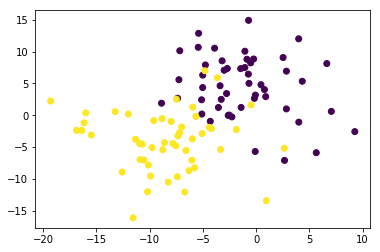

In [26]:
plt.scatter([x[0] for x in data[0]], [x[1] for x in data[0]], c=data[1])

In [30]:
X=data[0]
y=data[1]
logit=LogisticRegression()
logit.fit(X, y)

/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
y

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [32]:
logit.predict(X)

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [57]:
logit.predict(np.array([[10,10]]))

array([0])

In [58]:
logit.predict_proba(np.array([[10,10]]))

array([[9.99878280e-01, 1.21719517e-04]])

In [33]:
accuracy_score(y, logit.predict(X))

0.9

y=w1x1+w2x2+b

In [35]:
logit.intercept_

array([-1.42414338])

In [36]:
logit.coef_

array([[-0.37666822, -0.38228439]])

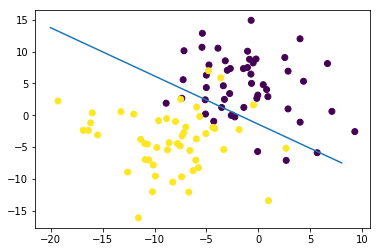

In [50]:
X_line=np.arange(-20,10,2)
plt.scatter([x[0] for x in data[0]], [x[1] for x in data[0]], c=data[1])
plt.plot(X_line, logit.coef_[0][0]*X_line+logit.coef_[0][1]*X_line+logit.intercept_)

In [216]:
data=load_boston()

In [217]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [218]:
df_boston.shape

(506, 14)

In [219]:
df_boston=pd.DataFrame(data.data, columns=data.feature_names)
#df_boston['noise']=np.linspace(1000,0,506)
#df_boston['noise2']=np.linspace(10000,0,506)
#df_boston['noise3']=np.linspace(100000,1000,506)

df_boston['target']=data.target


In [171]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


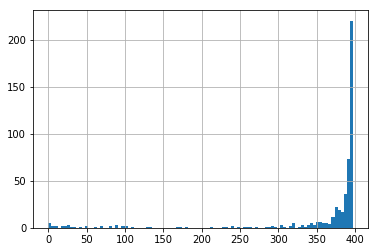

In [176]:
df_boston['B'].hist(bins=100)

In [182]:
sc=StandardScaler()

In [188]:
sc_data=sc.fit_transform(df_boston['B'].values.reshape(-1, 1))

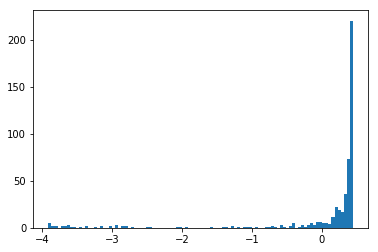

In [193]:
plt.hist(sc_data,bins=100)
plt.show()

In [195]:
X_train, X_test, y_train, y_test= train_test_split(df_boston.iloc[:,:-1], df_boston['target'],test_size=0.2,
                                                   random_state=17) 

In [198]:
df_boston.shape

(506, 14)

In [199]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [206]:
lr=LinearRegression()

In [207]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [208]:
df_predict=pd.DataFrame(y_test.values, columns=['real target'])
df_predict['predict']=lr.predict(X_test)

In [209]:
df_predict.head()


,real target,predict
0,30.5,30.522309
1,22.0,27.677461
2,17.7,19.991975
3,50.0,39.396118
4,23.3,26.036843


In [210]:
mean_squared_error(y_test, lr.predict(X_test))

19.8135168403005

In [211]:
dt=DecisionTreeRegressor()

In [212]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [213]:
mean_squared_error(y_test, dt.predict(X_test))

17.288921568627448

In [239]:
data_iris=load_iris()

In [240]:
print(data_iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [261]:
df_iris=pd.DataFrame(data_iris.data, columns=data_iris.feature_names)
df_iris['target']=data_iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [262]:
df_iris['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [275]:
X_train, X_test, y_train, y_test= train_test_split(df_iris.iloc[:,:-1] ,df_iris['target'],
                                                   test_size=0.20, random_state=42)

In [276]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [277]:
lg_iris=LogisticRegression()

In [278]:
lg_iris.fit(X_train, y_train)

/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sergei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [279]:
lg_iris.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [280]:
print(classification_report(y_test, lg_iris.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [281]:
dt_iris=DecisionTreeClassifier()

In [282]:
dt_iris.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [283]:
dt_iris.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [284]:
print(classification_report(y_test, dt_iris.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [285]:
cf=confusion_matrix(y_test, dt_iris.predict(X_test))

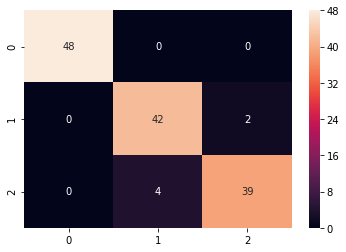

In [274]:
sns.heatmap(cf,annot=True )
plt.ylabel='predict'
plt.xlabel='real target'
plt.show()